## Общая информация

**Срок сдачи:** 5 апреля 2022, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [3]:
from scipy.spatial.distance import cdist
from sklearn.neighbors import KDTree

class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='minkowski'):
        self.alg = algorithm
        self.k = n_neighbors
        self.metric = metric
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.count = np.unique(y).shape[0]
        if self.alg == 'kd_tree':
            self.tree = KDTree(self.X_train, leaf_size=30)
    def predict(self, X):
        if self.alg == 'kd_tree':
            dist, ind = self.tree.query(X, k=self.k)
            return self._vote(self.y_train[ind], dist, self.count)
        dist = cdist(X, self.X_train, self.metric)
        distArg = np.argpartition(dist, kth=self.k, axis=1)[:,:self.k]
        return self._vote(self.y_train[distArg], dist[np.arange(dist.shape[0])[:, None], distArg], self.count)
        
    def _vote(self, y, wieghts, k):
        value = np.zeros(y.shape[0]*k).reshape(-1, k)
        for i in range(k):
            value[:, i] = np.sum(np.where(y == i, wieghts , 0), axis=1)
        return np.argmax(value, axis=1)
    

    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [7]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [8]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

### Задание 2 (0.5 балла)

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [9]:
%time clf.fit(X_train, y_train)

CPU times: user 1.14 ms, sys: 538 µs, total: 1.68 ms
Wall time: 1.27 ms


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [10]:
%time my_clf.fit(X_train, y_train)

CPU times: user 413 µs, sys: 195 µs, total: 608 µs
Wall time: 523 µs


In [11]:
%time clf.predict(X_test)

CPU times: user 4.13 ms, sys: 21 µs, total: 4.15 ms
Wall time: 3.24 ms


array([0, 2, 2, 1, 0, 2, 1, 1, 0, 2, 2, 1, 1, 0, 0])

In [12]:
%time my_clf.predict(X_test)

CPU times: user 1.26 ms, sys: 382 µs, total: 1.65 ms
Wall time: 1.04 ms


array([0, 2, 2, 1, 0, 2, 1, 1, 0, 2, 2, 1, 1, 0, 0])

### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [13]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [15]:
%time clf.fit(X_train, y_train)

CPU times: user 1.84 ms, sys: 51 µs, total: 1.89 ms
Wall time: 1.42 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [16]:
%time my_clf.fit(X_train, y_train)

CPU times: user 1.56 ms, sys: 0 ns, total: 1.56 ms
Wall time: 1.18 ms


In [17]:
%time clf.predict(X_test)

CPU times: user 3.28 ms, sys: 0 ns, total: 3.28 ms
Wall time: 4.05 ms


array([2, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 0, 0, 2, 0])

In [18]:
%time my_clf.predict(X_test)

CPU times: user 889 µs, sys: 404 µs, total: 1.29 ms
Wall time: 1.1 ms


array([2, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 0, 0, 2, 0])

In [19]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

### Задание 4 (2.5 балла)

Рассмотрим новый датасет 20 newsgroups

In [20]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [24]:
data = newsgroups['data']
target = newsgroups['target']
np.unique(np.array(target), return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377]))

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word', token_pattern='[a-zA-Z]{2,20}', min_df=300, max_df=600)
X = vectorizer.fit_transform(data).toarray()
print(np.array(vectorizer.get_feature_names_out()).shape)

(236,)


*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [27]:
from sklearn.model_selection import cross_validate, KFold

kf = KFold(n_splits=3)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    print(train_index, test_index)



[ 3772  3773  3774 ... 11311 11312 11313] [   0    1    2 ... 3769 3770 3771]
[    0     1     2 ... 11311 11312 11313] [3772 3773 3774 ... 7540 7541 7542]
[   0    1    2 ... 7540 7541 7542] [ 7543  7544  7545 ... 11311 11312 11313]


In [28]:
clf = MyKNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
clf.fit(X[:4000], target[:4000])
print(accuracy_score(target[4000:6000], clf.predict(X[4000:6000])))

0.1525


In [29]:
for train_index, test_index in kf.split(X):
    clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
    clf.fit(X[train_index], target[train_index])
    print(accuracy_score(target[test_index], clf.predict(X[test_index])))
    

0.16887592788971367
0.14160700079554495
0.15619199151418722


Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

0.1837540807181445
0.1555583067331486
0.16890538470602098
0.1729709409092984
0.17915802061067895
0.18835002365450307
0.18932216889530798
0.19427215604866785
0.19303494632954007
0.19515639952497896
best result is 0.19515639952497896 when neighbors are 10


Text(0.5, 1.0, 'Евклидова мера')

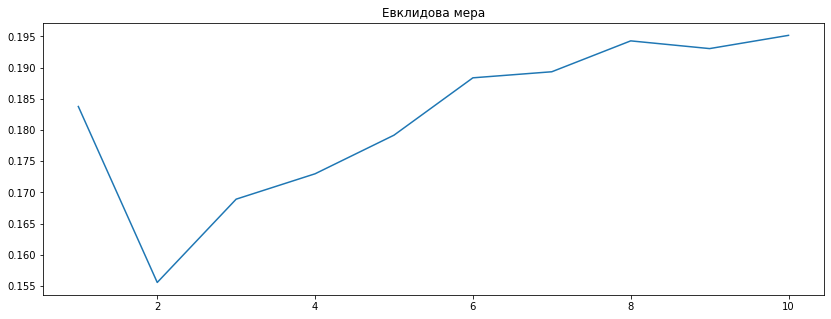

In [30]:
%matplotlib inline
fig = plt.figure(figsize= (14,5))
ax = plt.subplot(111)

def getBest():
    ycord = np.zeros(10)

    for i in range(10):
        value = 0
        for train_index, test_index in kf.split(X):
            clf = MyKNeighborsClassifier(n_neighbors=i+1, algorithm='kd_tree')
            clf.fit(X[train_index], target[train_index])
            value += accuracy_score(target[test_index], clf.predict(X[test_index]))
        ycord[i] = value/3
        print(ycord[i])
    return ycord

ycord = getBest()
print("best result is", np.max(ycord), "when neighbors are", np.argmax(ycord) + 1)
ax.plot(np.arange(10) + 1, ycord)
ax.set_title("Евклидова мера")

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [31]:
value = 0
for train_index, test_index in kf.split(X):
    clf = MyKNeighborsClassifier(n_neighbors=8, algorithm='kd_tree')
    clf.fit(X[train_index], target[train_index])
    value += accuracy_score(target[test_index], clf.predict(X[test_index]))
value/3


0.19427215604866785

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', token_pattern='[a-zA-Z]{2,20}', min_df=15, max_df=300, max_features=200)
X = vectorizer.fit_transform(data).toarray()
X.shape

(11314, 200)

In [33]:
value = 0
for train_index, test_index in kf.split(X):
    clf = MyKNeighborsClassifier(n_neighbors=8, algorithm='brute', metric='cosine')
    clf.fit(X[train_index], target[train_index])
    value += accuracy_score(target[test_index], clf.predict(X[test_index]))
value/3

0.2776203701125939

In [34]:
vectorizer = TfidfVectorizer(analyzer='word', token_pattern='[a-zA-Z]{2,20}', min_df=15, max_df=300)
X = vectorizer.fit_transform(data).toarray()
X.shape

(11314, 7111)

In [35]:
value = 0
for train_index, test_index in kf.split(X):
    clf = KNeighborsClassifier(n_neighbors=8, algorithm='brute', metric='cosine')
    clf.fit(X[train_index], target[train_index])
    value += accuracy_score(target[test_index], clf.predict(X[test_index]))
value/3

0.6050027469594332

Результат улучшается при использовании косинусной метрики


Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [36]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [37]:
y_test = newsgroups['target']

vectorizer = TfidfVectorizer(analyzer='word', token_pattern='[a-zA-Z]{2,20}', min_df=15, max_df=300)
X = vectorizer.fit_transform(data).toarray()

X_test = vectorizer.transform(newsgroups['data'])

clf = KNeighborsClassifier(n_neighbors=8, algorithm='brute', metric='cosine')
clf.fit(X, target)
accuracy_score(y_test, clf.predict(X_test))


0.5394317578332448

Качество отличается по двум основным причинам: 1) На тесте выбирались парметры которые лучше подходили для трейна, следовательно могло возникнуть переобучение

2) На трейне при использовался векторизация обученная на всей data, следовательно в тесте при кросс валидации не было новых слов